### Table of Contents

* [Task 1 (Do not use sklearn library)](#chapter1)
    * [1. Read the data and calculate summary statistics.](#section_1_1)
    * [2. Calculate the correlation coefficient for sepal width and sepal length.](#section_1_2)
    * [3. Find the best-fitting straight line relating y and x (slope estimate, intercept estimate, estimated regression line).](#section_1_3)
    * [4. Plot the points on a scatter diagram and draw the line of best fit.](#section_1_4)
    * [5. Comment on your results.](#section_1_5)
* [Task 2 (Use sklearn library)](#chapter2)
    * [1. Import packages and read the data.](#section_2_1)
    * [2. Create a model and fit it.](#section_2_2)
    * [3. Get results (coefficient of determination, slope, intercept).](#section_2_3)
    * [4. Obtain predicted response.](#section_2_4)
    * [5. Comment on your results](#section_2_5)
* [Task 3 (Use sklearn library)](#chapter3)
    * [1. Separate data into train (rows 2-39) and test (40-49).](#section_3_1)
    * [2. Create a model and fit it.](#section_3_2)
    * [3. Obtain predicted response for train and test.](#section_3_3)
    * [4. Evaluate train and test data predictions. Show results for R-squred, MSE, RMSE, MAE.](#section_3_4)
    * [5. Why should we look at test data predictions rather than train data predictions?](#section_3_5)
* [Task 3.2 using train_test_split](#chapter4)

### Task 1 (Do not use sklearn library) <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd#import needed libraries
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('C:\\Users\\adala\\Downloads\\HW-2ds')

In [2]:
file = r'iris_setosa.xls'
df = pd.read_excel(file, engine = 'xlrd' )#read our dataset, used 'xlrd' because it didnt read data withou it.

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


#### 1. Read the data and calculate summary statistics. <a class="anchor" id="section_1_1"></a>

In [3]:
df.head()

,X,Y
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0


In [4]:
X = df.X.to_numpy()#applying data to variables
y = df.Y.to_numpy()

In [5]:
sum_x = np.sum(X)# we calculate sum for the x 
sum_x2 = np.sum([i*i for i in X])#and squared x sum to use them in future to find correaltion coefficent
print(sum_x)
print(sum_x2)

165.2
575.3600000000001


In [6]:
sum_y = np.sum(y)# we calculate sum for the y
sum_y2 = np.sum([i*i for i in y])#and squared y sum to use them in future to find correaltion coefficent
print(sum_y)
print(sum_y2)

240.4
1210.04


In [7]:
sum_xy = np.sum([X[i]*y[i] for i in range(len(y))])#These argument is sum of multiplication of x and y
print(sum_xy)

831.87


In [8]:
n = len(X)
print(n)

48


#### 2. Calculate the correlation coefficient for sepal width and sepal length. <a class="anchor" id="section_1_2"></a>

In [9]:
corr_coef = (sum_xy - sum_x*sum_y/n)/np.sqrt((sum_x2 - sum_x*sum_x/n)*(sum_y2 - sum_y*sum_y/n))#using formula above we calculate corr. cof.
print(np.round(corr_coef, 4))

0.7015


#### 3. Find the best-fitting straight line relating y and x (slope estimate, intercept estimate, estimated regression line). <a class="anchor" id="section_1_3"></a>

In [10]:
slope = (sum_xy - sum_x*sum_y/n)/(sum_x2 - sum_x*sum_x/n)#calculating slope of the line
print(np.round(slope, 3))

0.661


In [11]:
intercept = sum_y/n - slope*sum_x/n#calculating intercept of the line
print(np.round(intercept, 3))

2.733


In [12]:
X = np.array(X)
y = np.array(y)
y_pred = intercept + slope*X#linear regression model

$$ y = 2.733 + 0.661 x$$

#### 4. Plot the points on a scatter diagram and draw the line of best fit. <a class="anchor" id="section_1_4"></a>

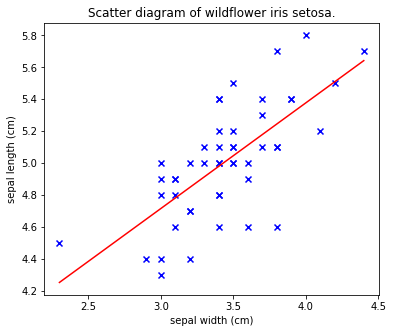

In [13]:
plt.figure(figsize=(6,5))
plt.scatter(X, y, c='blue', marker='x') #plotting our data
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.xlabel('sepal width (cm)')
plt.ylabel('sepal length (cm)')
plt.title('Scatter diagram of wildflower iris setosa.')
plt.show()

##### 5. Comment on your results. <a class="anchor" id="section_1_5"></a>

The data set consists two variables X(sepal width (cm)) as dependent variable and Y(sepal length (cm)) as independent variable.
Calculating correlation coefficent between these two vatiables we have got 0.7015. According to this value we can see the resulst we have got is the strong positive correlation. What actually represents that as our sepal width increases the sepal length increases as well. We used our summary statistics also to calculate the slope and intercept of our linear regression function. Slope is equal to 0.661 and intercept is equal to 2.733 what gives us $$ y = 2.733 + 0.661 x$$ linear regression function like this

### Task 2 (Use sklearn library) <a class="anchor" id="chapter2"></a>

#### 1. Import packages and read the data. <a class="anchor" id="section_2_1"></a>

In [14]:
from sklearn.linear_model import LinearRegression#import LinearRegression from sklearn

In [15]:
X = np.array(X).reshape((-1, 1))#reshaping our x variable
y = np.array(y)

#### 2. Create a model and fit it. <a class="anchor" id="section_2_2"></a>

In [16]:
model_lr = LinearRegression().fit(X, y)#fitting and creating our model

#### 3. Get results (coefficient of determination, slope, intercept). <a class="anchor" id="section_2_3"></a>

In [17]:
R_sq = model_lr.score(X, y)#check the Coefficient of determination
print('Coefficient of determination:', np.round(R_sq, 3))

Coefficient of determination: 0.492


In [18]:
corr_coef = np.sqrt(R_sq)#check the Correlation coefficient
print('Correlation coefficient:', np.round(corr_coef, 4))

Correlation coefficient: 0.7015


In [19]:
print('Intercept:', np.round(model_lr.intercept_,3))#check the Intercept
print('Slope:', np.round(model_lr.coef_,3))#check the Slope

Intercept: 2.733
Slope: [0.661]


#### 4. Obtain predicted response. <a class="anchor" id="section_2_4"></a>

In [20]:
y_pred = model_lr.predict(X)#using our model to make predictions on existin data
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[5.04689799 4.7163438  4.84856547 4.78245463 5.11300883 5.31134134
 4.98078715 4.98078715 4.65023296 4.78245463 5.17911967 4.98078715
 4.7163438  5.37745218 5.64189554 5.31134134 5.04689799 5.24523051
 5.24523051 4.98078715 5.17911967 5.11300883 4.91467631 4.98078715
 4.7163438  4.98078715 5.04689799 4.98078715 4.84856547 4.78245463
 4.98078715 5.44356302 5.50967386 4.78245463 4.84856547 5.04689799
 5.11300883 4.7163438  4.98078715 5.04689799 4.25356793 4.84856547
 5.04689799 5.24523051 4.7163438  5.24523051 5.17911967 4.91467631]


#### 5. Comment on your results <a class="anchor" id="section_2_5"></a>

Here we have worked with the same data to fit our model, but without these multiple calculating procceses. Sklearn library has created a model and calculated everything by LinearRegression().fit(X, y) function. The new thing that we have done is used predict() function to make a prediction on existing table.

### Task 3 (Use sklearn library) <a class="anchor" id="chapter3"></a>

#### 1. Separate data into train (rows 2-39) and test (40-49). <a class="anchor" id="section_3_1"></a>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
X = np.array(X).reshape((-1, 1))
y = np.array(y)

In [23]:
X_train, X_test = X[:40], X[40:49]#Separate data into train (rows 2-39) and test (40-49)
y_train, y_test = y[:40], y[40:49]

#### 2. Create a model and fit it. <a class="anchor" id="section_3_2"></a>

In [24]:
model_lr = LinearRegression().fit(X_train, y_train)#fitting and creating our model on trained data

#### 3. Obtain predicted response for train and test. <a class="anchor" id="section_3_3"></a>

In [25]:
train_pred = model_lr.predict(X_train)#model predictions for trainde data
print(train_pred)

[5.06893862 4.6912441  4.84232191 4.766783   5.14447752 5.37109423
 4.99339971 4.99339971 4.61570519 4.766783   5.22001642 4.99339971
 4.6912441  5.44663313 5.74878875 5.37109423 5.06893862 5.29555533
 5.29555533 4.99339971 5.22001642 5.14447752 4.91786081 4.99339971
 4.6912441  4.99339971 5.06893862 4.99339971 4.84232191 4.766783
 4.99339971 5.52217204 5.59771094 4.766783   4.84232191 5.06893862
 5.14447752 4.6912441  4.99339971 5.06893862]


In [26]:
test_pred = model_lr.predict(X_test)#model predictions for tested data
print(test_pred)

[4.16247177 4.84232191 5.06893862 5.29555533 4.6912441  5.29555533
 5.22001642 4.91786081]


In [27]:
y_test

array([4.5, 4.4, 5. , 5.1, 4.8, 4.6, 5.3, 5. ])

#### 4. Evaluate train and test data predictions. Show results for R-squred, MSE, RMSE, MAE. <a class="anchor" id="section_3_4"></a>

In [28]:
def print_evaluate(true, predicted):  
    r2_square = metrics.r2_score(true, predicted)#Getting R squared value
    mse = metrics.mean_squared_error(true, predicted)#Getting MSE  value
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))#Getting RMSE value
    mae = metrics.mean_absolute_error(true, predicted)#Getting MAE value
    print('R-squared', np.round(r2_square,3))
    print('MSE:', np.round(mse,3))
    print('RMSE:', np.round(rmse,3))
    print('MAE:', np.round(mae,3))

In [29]:
print_evaluate(y_train, train_pred)

R-squared 0.55
MSE: 0.057
RMSE: 0.239
MAE: 0.196


In [30]:
print_evaluate(y_test, test_pred)

R-squared -0.233
MSE: 0.108
RMSE: 0.328
MAE: 0.251


#### 5. Why should we look at test data predictions rather than train data predictions? <a class="anchor" id="section_3_5"></a>

The reason why we have to more pay attention to the test data prediction is because test data is new data for our model, meanwhile train data or existing one was used to fit and train our model so of course prediction accuracy is more more accurate. In total we can say that we are giving our trained model new data (test data) to see how it will predict on unfamiliar data.

# Task 3.2 using train_test_split <a class="anchor" id="chapter4"></a>

In [31]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)
#do the same thing as like we have done previously but now split data buy train_test_split functions

In [32]:
model_lr_2 = LinearRegression().fit(X_train_2, y_train_2)#fit and buid our model

In [33]:
train_pred_2 = model_lr_2.predict(X_train_2)#model predictions for trainde data
print(train_pred_2)

[4.61666667 4.75707965 4.96769912 5.0379056  4.75707965 5.38893805
 5.24852507 5.24852507 5.31873156 4.75707965 5.0379056  4.75707965
 5.52935103 5.17831858 5.0379056  5.45914454 4.96769912 5.31873156
 4.96769912 4.82728614 4.68687316 4.68687316 5.10811209 4.82728614
 5.10811209 5.0379056  4.96769912 4.82728614 5.17831858 4.89749263
 5.24852507 4.89749263 5.17831858 4.96769912 5.0379056  5.66976401
 4.82728614 4.96769912]


In [34]:
test_pred_2 = model_lr.predict(X_test_2)#model predictions for tested data
print(test_pred_2)

[4.99339971 4.16247177 5.06893862 5.29555533 4.6912441  4.6912441
 4.6912441  4.99339971 5.14447752 4.99339971]


In [35]:
print_evaluate(y_train_2, train_pred_2)#We can see that our R^2 score getting more simmiliar to test data

R-squared 0.492
MSE: 0.062
RMSE: 0.249
MAE: 0.196


In [36]:
print_evaluate(y_test_2, test_pred_2)

R-squared 0.424
MSE: 0.073
RMSE: 0.27
MAE: 0.242
